In [2]:
import math

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
arr = np.arange(0,10,.01)

# Рівномірний розподіл

In [4]:
def uniform_distribution_function(sample, a, b):
    result = np.zeros(sample.size)
    for i in range(sample.size):
        if a <= sample[i] <= b:
            result[i] = (sample[i] - a) / (b - a)
        elif sample[i] > b:
            result[i] = 1

    return result

In [5]:
def density_uniform_distribution(sample, a, b):
    result = np.zeros(sample.size)
    for i in range(sample.size):
        if a <= sample[i] <= b:
            result[i] = 1 / (b-a)
    return result

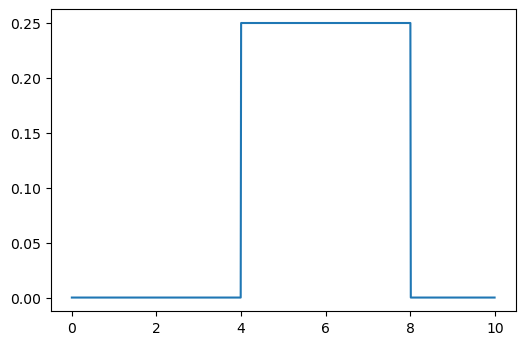

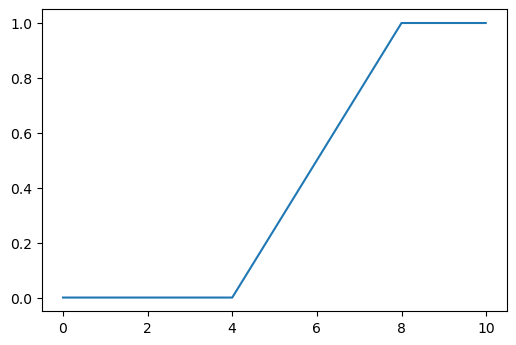

In [6]:
x = 4
y = 8
f = uniform_distribution_function(arr, x, y)
density = density_uniform_distribution(arr, x, y)

plt.figure(num=0, dpi=100)
plt.plot(arr, density)
plt.show()

plt.figure(num=0, dpi=100)
plt.plot(arr, f)
plt.show()

# Експоненціальний розподіл

In [7]:
def exponential_distribution_function(sample, b):
    result = np.zeros(sample.size)
    for i in range(sample.size):
        if sample[i] >= 0:
            result[i] = 1 - math.e**(-b * sample[i])

    return result

In [8]:
def exponential_distribution_density(sample, b):
    result = np.zeros(sample.size)
    for i in range(sample.size):
        if sample[i] > 0:
            result[i] = b * math.e ** (-b * sample[i])

    return result

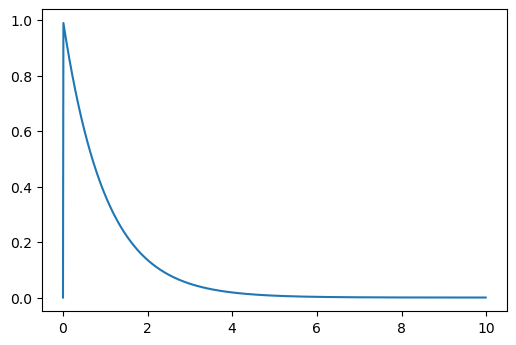

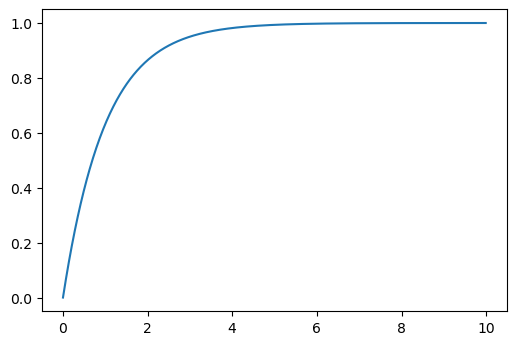

In [9]:
e = exponential_distribution_function(arr, 1)
e_d = exponential_distribution_density(arr, 1)

plt.figure(num=0, dpi=100)
plt.plot(arr, e_d)
plt.show()

plt.figure(num=0, dpi=100)
plt.plot(arr, e)
plt.show()

# Нормальний розподіл

In [10]:
def density_of_normal_distribution(sample, mean, sigm):
    result = np.zeros(sample.size)

    for i in range(sample.size):
        result[i] = (math.e ** -(((sample[i] - mean)**2)/(2 * (sigm**2)))) / (sigm * np.sqrt(2 * math.pi))

    return result

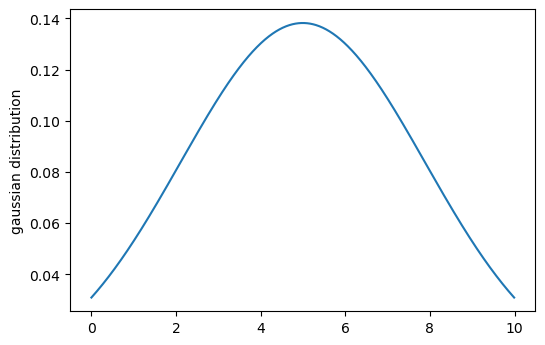

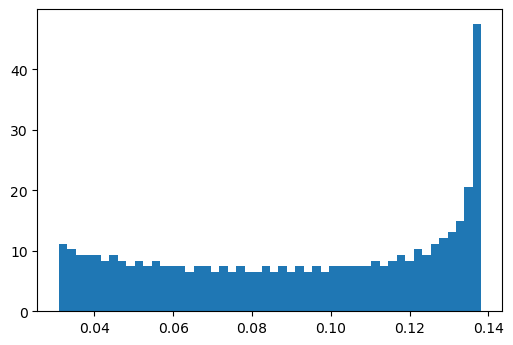

In [11]:
norm_density = density_of_normal_distribution(arr, arr.mean(), arr.std())

plt.figure(num=0, dpi=100)
plt.plot(arr, norm_density)
plt.ylabel('gaussian distribution')
plt.show()

plt.figure(num=0, dpi=100)
plt.hist(norm_density, bins=50, density=True)
plt.show()

# Алгоритм Бокса-Мюллєра

In [12]:
%%time
def f(theta, E):
    return np.cos(theta) * np.sqrt(2*E)

def Box_Muller(n):
    result = np.zeros(n)
    for i in range(n):
        theta = np.random.uniform(low=0, high=2*np.pi, size=1)
        E = np.random.exponential(scale=1/1, size=1)
        x = f(theta, E)
        result[i] = x

    return result

x = Box_Muller(10**4)

Wall time: 348 ms


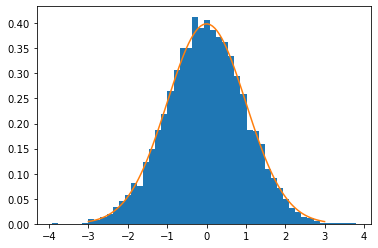

In [13]:
plt.figure()
plt.hist(x, bins=50, density=True)
xx = np.linspace(-3, 3, 100)
plt.plot(xx, stats.norm.pdf(xx))
plt.show()

# Зиккурат-алгоритм

In [14]:
!pip install zignor

In [15]:
import zignor

In [16]:
%%time

x = zignor.randn(10**4)

Wall time: 5 ms


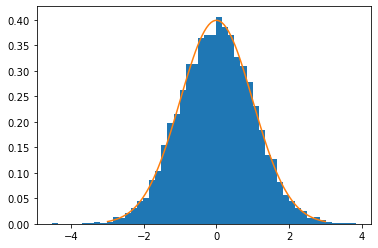

In [17]:
plt.figure()
plt.hist(x, bins=50, density=True)
xx = np.linspace(-3, 3, 100)
plt.plot(xx, stats.norm.pdf(xx))
plt.show()